In [11]:
import random
import math
from src.genetic_functions import *

#### LOAD THE DATA

In [12]:
file_path = "data/jobshop1.txt"  

#Three instances with differences in jobs and machines are selected for testing in different populations
instances_to_extract = ["ft06", "abz5", "abz7"]

instances = extract_instances_to_dict(file_path, instances_to_extract)

# Check
if not instances:
    print("No instances were extracted. Check the names in instances_to_extract and the source file.")
else:
    for instance_name, instance_data in instances.items():
        print(f"instance: {instance_name}")
        print(f"Number of jobs: {instance_data['num_jobs']}")
        print(f"Number of machines: {instance_data['num_machines']}")
        print("Time matrix:")
        for row in instance_data["processing_times"]:
            print(row)
        print("------")

instance: abz5
Number of jobs: 10
Number of machines: 10
Time matrix:
[4, 88, 8, 68, 6, 94, 5, 99, 1, 67, 2, 89, 9, 77, 7, 99, 0, 86, 3, 92]
[5, 72, 3, 50, 6, 69, 4, 75, 2, 94, 8, 66, 0, 92, 1, 82, 7, 94, 9, 63]
[9, 83, 8, 61, 0, 83, 1, 65, 6, 64, 5, 85, 7, 78, 4, 85, 2, 55, 3, 77]
[7, 94, 2, 68, 1, 61, 4, 99, 3, 54, 6, 75, 5, 66, 0, 76, 9, 63, 8, 67]
[3, 69, 4, 88, 9, 82, 8, 95, 0, 99, 2, 67, 6, 95, 5, 68, 7, 67, 1, 86]
[1, 99, 4, 81, 5, 64, 6, 66, 8, 80, 2, 80, 7, 69, 9, 62, 3, 79, 0, 88]
[7, 50, 1, 86, 4, 97, 3, 96, 0, 95, 8, 97, 2, 66, 5, 99, 6, 52, 9, 71]
[4, 98, 6, 73, 3, 82, 2, 51, 1, 71, 5, 94, 7, 85, 0, 62, 8, 95, 9, 79]
[0, 94, 6, 71, 3, 81, 7, 85, 1, 66, 2, 90, 4, 76, 5, 58, 8, 93, 9, 97]
[3, 50, 0, 59, 1, 82, 8, 67, 7, 56, 9, 96, 6, 58, 4, 81, 5, 59, 2, 96]
------
instance: abz7
Number of jobs: 20
Number of machines: 15
Time matrix:
[2, 24, 3, 12, 9, 17, 4, 27, 0, 21, 6, 25, 8, 27, 7, 26, 1, 30, 5, 31, 11, 18, 14, 16, 13, 39, 10, 19, 12, 26]
[6, 30, 3, 15, 12, 20, 11, 19, 1

In [13]:
ft06_data = instances["ft06"]
abz5_data = instances["abz5"]

In [14]:
ft06_data

{'num_jobs': 6,
 'num_machines': 6,
 'processing_times': [[2, 1, 0, 3, 1, 6, 3, 7, 5, 3, 4, 6],
  [1, 8, 2, 5, 4, 10, 5, 10, 0, 10, 3, 4],
  [2, 5, 3, 4, 5, 8, 0, 9, 1, 1, 4, 7],
  [1, 5, 0, 5, 2, 5, 3, 3, 4, 8, 5, 9],
  [2, 9, 1, 3, 4, 5, 5, 4, 0, 3, 3, 1],
  [1, 3, 3, 3, 5, 9, 0, 10, 4, 4, 2, 1]]}

In [15]:
import random
import matplotlib.pyplot as plt

def genetic_algorithm(
    num_jobs, 
    num_machines, 
    processing_times, 
    population_size=100, 
    generations=500, 
    mutation_probability=0.1, 
    crossover_method="one_point", 
    selection_method="tournament", 
    mutation_method = "simple",
    tournament_size=3,
    elitism_count = 2
):
    """
    Solves the Job Shop Scheduling Problem (JSSP) using a genetic algorithm.

    Args:
        num_jobs: Number of jobs.
        num_machines: Number of machines.
        processing_times: Array defining the machines and times for each operation.
        population_size: Size of the population.
        generations: Number of generations to run.
        mutation_probability: Probability of mutation.
        crossover_method: "one_point" or "cycle".
        selection_method: "tournament" or "roulette".
        tournament_size: Size of the tournament (only for tournament selection).

    Returns:
        best_chromosome: The best solution found.
        best_fitness: The makespan of the best solution.
        fitness_evolution: List with the minimum fitness value in each generation.
    """
    # Step 1: Initialize population
    population = [generate_chromosome(num_jobs, num_machines) for _ in range(population_size)]
    fitness_evolution = []

    # Evaluate initial fitness
    fitness_values = [
        compute_fitness_with_validation(chromosome, num_jobs, num_machines, processing_times)
        for chromosome in population
    ]

    for generation in range(generations):
        # Step 2: Selection of parents
        new_population = []

        # Elitism: select the best `elitism_count` chromosomes and add them directly to the new population
        sorted_population = sorted(zip(population, fitness_values), key=lambda x: x[1])  # Sort by fitness
        elites = [x[0] for x in sorted_population[:elitism_count]]  # Get the best elite chromosomes
        new_population.extend(elites)


        for _ in range((population_size - elitism_count) // 2):  # Each iteration generates two children
            if selection_method == "tournament":
                parent1 = tournament_selection(population, fitness_values, tournament_size)
                parent2 = tournament_selection(population, fitness_values, tournament_size)
            elif selection_method == "roulette":
                parent1 = roulette_selection(population, fitness_values)
                parent2 = roulette_selection(population, fitness_values)
            else:
                raise ValueError("Invalid selection method!")

            # Step 3: Crossover
            if crossover_method == "one_point":
                child1 = one_point_crossover(parent1, parent2)
                child2 = one_point_crossover(parent2, parent1)
            elif crossover_method == "cycle":
                child1 = cycle_crossover(parent1, parent2)
                child2 = cycle_crossover(parent2, parent1)
            else:
                raise ValueError("Invalid crossover method!")

            # Step 4: Mutation
            if random.random() < mutation_probability:
                if mutation_method == "simple":
                    child1 = mutation(child1)
                elif mutation_method == "rotation":
                    child1 = mutate_rotation(child1)

            if random.random() < mutation_probability:
                if mutation_method == "simple":
                    child2 = mutation(child2)
                elif mutation_method == "rotation":
                    child2 = mutate_rotation(child2)

            new_population.extend([child1, child2])

        # Update population and fitness
        population = new_population
        fitness_values = [
            compute_fitness_with_validation(chromosome, num_jobs, num_machines, processing_times)
            for chromosome in population
        ]

        # Track best fitness in this generation
        best_fitness = min(fitness_values)
        fitness_evolution.append(best_fitness)

        # Check if system reaches stationary state (e.g., no improvement in last 50 generations)
        if len(fitness_evolution) > 50 and all(
            fitness == fitness_evolution[-1] for fitness in fitness_evolution[-50:]
        ):
            print(f"Stationary state reached at generation {generation}")
            break

    # Return the best solution found
    best_index = fitness_values.index(min(fitness_values))
    best_chromosome = population[best_index]
    return best_chromosome, min(fitness_values), fitness_evolution


Running genetic algorithm for abz5
Stationary state reached at generation 50


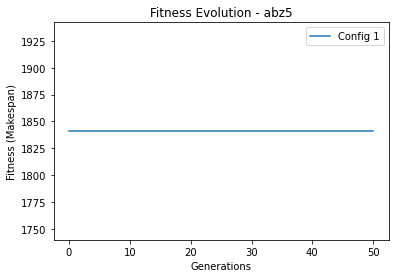

Stationary state reached at generation 57


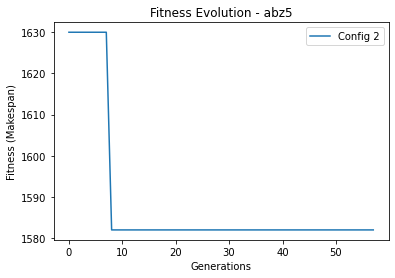

Stationary state reached at generation 50


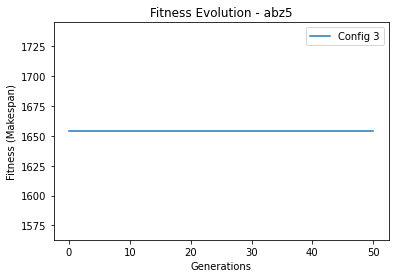

Stationary state reached at generation 50


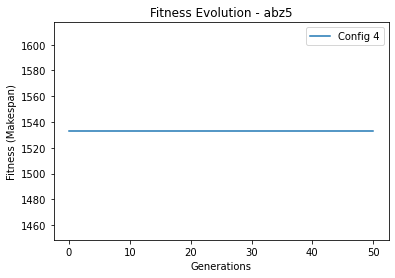

Stationary state reached at generation 76


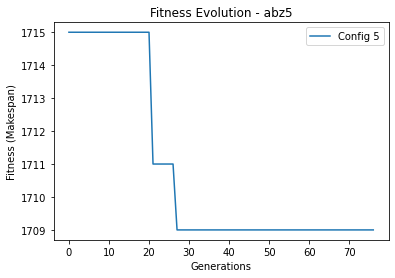

Stationary state reached at generation 202


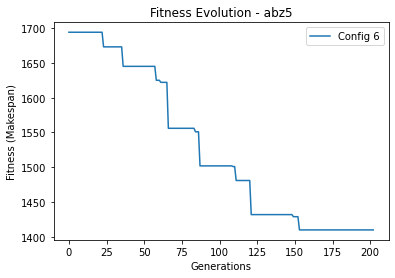

Running genetic algorithm for abz7
Stationary state reached at generation 291


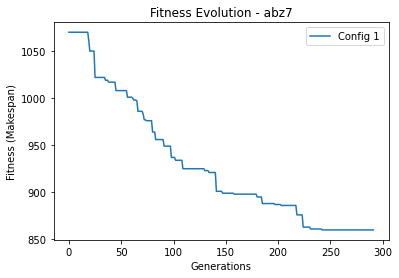

Stationary state reached at generation 50


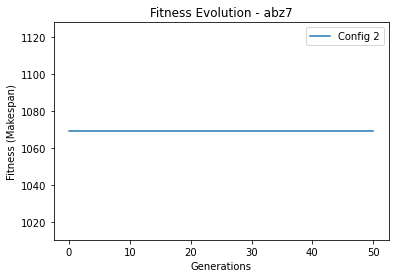

Stationary state reached at generation 50


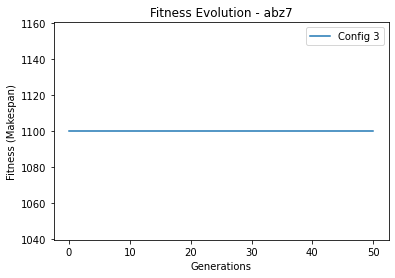

Stationary state reached at generation 77


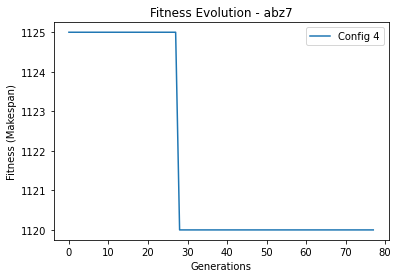

Stationary state reached at generation 101


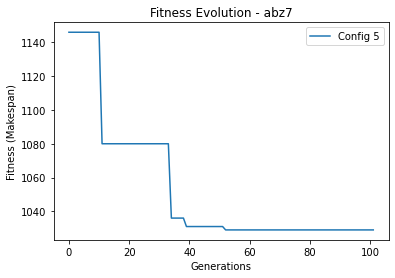

Stationary state reached at generation 50


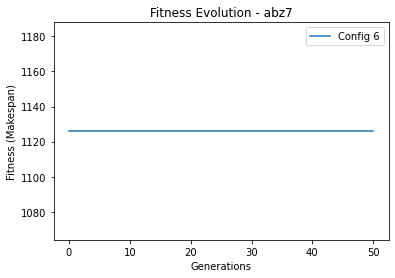

Running genetic algorithm for ft06
Stationary state reached at generation 50


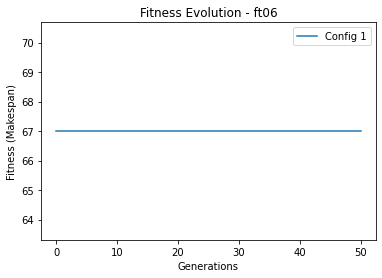

Stationary state reached at generation 50


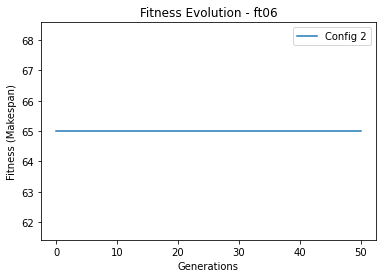

Stationary state reached at generation 93


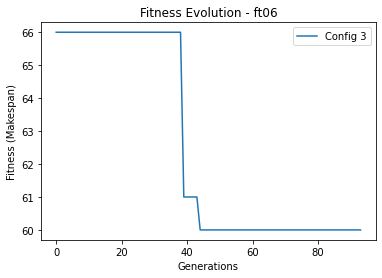

Stationary state reached at generation 50


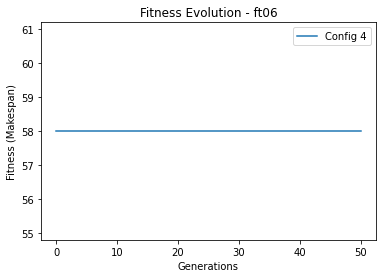

Stationary state reached at generation 63


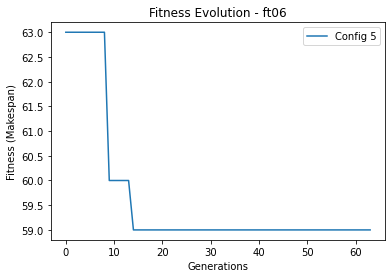

Stationary state reached at generation 50


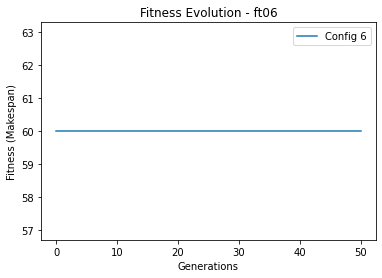

In [16]:
# Data
file_path = "data/jobshop1.txt"  

#Three instances with differences in jobs and machines are selected for testing in different populations
instances_to_extract = ["ft06", "abz5", "abz7"]

instances = extract_instances_to_dict(file_path, instances_to_extract)


results = []
for instance_name, instance_data in instances.items():
    print(f"Running genetic algorithm for {instance_name}")
    num_jobs = instance_data["num_jobs"]
    num_machines = instance_data["num_machines"]
    processing_times = instance_data["processing_times"]

    # By randonmes 6 diferent combinations are going to be choosen and executed
    for config in range(1, 7):
        population_size = random.choice([50, 100, 150])
        mutation_probability = random.choice([0.05, 0.1, 0.2])
        crossover_method = random.choice(["one_point", "cycle"])
        selection_method = random.choice(["tournament", "roulette"])
        mutation_method = random.choice(["simple", "rotation"])

       
        best_chromosome, best_fitness, fitness_evolution = genetic_algorithm(
            num_jobs,
            num_machines,
            processing_times,
            population_size=population_size,
            generations=500,
            mutation_probability=mutation_probability,
            crossover_method=crossover_method,
            selection_method=selection_method,
            mutation_method=mutation_method,
            tournament_size=3
        )

        # save results
        results.append({
            "instance": instance_name,
            "config": config,
            "best_fitness": best_fitness,
            "fitness_evolution": fitness_evolution,
            "parameters": {
                "population_size": population_size,
                "mutation_probability": mutation_probability,
                "crossover_method": crossover_method,
                "selection_method": selection_method,
                "mutation_method": mutation_method
            }
        })

        # Plot evolution
        plt.plot(fitness_evolution, label=f"Config {config}")
        plt.xlabel("Generations")
        plt.ylabel("Fitness (Makespan)")
        plt.title(f"Fitness Evolution - {instance_name}")
        plt.legend()
        plt.show()


In [17]:
results

[{'instance': 'abz5',
  'config': 1,
  'best_fitness': 1841,
  'fitness_evolution': [1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841,
   1841],
  'parameters': {'population_size': 50,
   'mutation_probability': 0.2,
   'crossover_method': 'one_point',
   'selection_method': 'roulette',
   'mutation_method': 'simple'}},
 {'instance': 'abz5',
  'config': 2,
  'best_fitness': 1582,
  'fitness_evolution': [1630,
   1630,
   1630,
   1630,
   1630,
   1630,
   1630,
   1630,
   1582,
   1582,
   1582,
   1582,
   1582,
   1582,
   1582,
   1582,
   1582,
   1582,
   1582,
   1582,
   1582,
   1582,
 

### Implementation of a second optimization algorithm

In [9]:
def simulated_annealing(initial_solution, num_jobs, num_machines, processing_times, initial_temperature, cooling_rate, max_iterations):
    """
    Simulated Annealing algorithm for Job Shop Scheduling Problem.

    Args:
        initial_solution (list): Initial chromosome (solution).
        num_jobs (int): Number of jobs.
        num_machines (int): Number of machines.
        processing_times (list): Array defining the machines and times for each operation.
        initial_temperature (float): Starting temperature for the algorithm.
        cooling_rate (float): Rate at which the temperature decreases.
        max_iterations (int): Maximum number of iterations at each temperature level.

    Returns:
        list: Best solution found.
        float: Fitness of the best solution.
    """
    current_solution = initial_solution[:]
    current_fitness = compute_fitness_with_validation(current_solution, num_jobs, num_machines, processing_times)
    
    best_solution = current_solution[:]
    best_fitness = current_fitness

    temperature = initial_temperature

    while temperature > 0.1:  # Stop when the temperature is sufficiently low
        for _ in range(max_iterations):
            # Generate a neighbor solution by mutating the current solution
            neighbor_solution = mutation(current_solution[:])

            # Compute the fitness of the neighbor solution
            neighbor_fitness = compute_fitness_with_validation(neighbor_solution, num_jobs, num_machines, processing_times)

            # Calculate the change in fitness (delta)
            delta = neighbor_fitness - current_fitness

            # Accept the neighbor solution if it's better, or with a probability based on temperature
            if delta < 0 or random.random() < math.exp(-delta / temperature):
                current_solution = neighbor_solution[:]
                current_fitness = neighbor_fitness

                # Update the best solution found so far
                if current_fitness < best_fitness:
                    best_solution = current_solution[:]
                    best_fitness = current_fitness

        # Decrease the temperature
        temperature *= cooling_rate

    return best_solution, best_fitness

In [10]:
# Data
file_path = "data/jobshop1.txt"  

# Three instances with differences in jobs and machines are selected for testing
instances_to_extract = ["ft06", "abz5", "abz7"]
instances = extract_instances_to_dict(file_path, instances_to_extract)

# Parameters for the algorithms
sa_initial_temperature = 1000
sa_cooling_rate = 0.95
sa_max_iterations = 500

results_sa = []

for instance_name, instance_data in instances.items():
    print(f"Running Simulated Annealing for {instance_name}")
    
    # Extract instance data
    num_jobs = instance_data["num_jobs"]
    num_machines = instance_data["num_machines"]
    processing_times = instance_data["processing_times"]

    # Generate initial solution
    initial_solution = generate_chromosome(num_jobs, num_machines)

    # Run Simulated Annealing
    sa_best_solution, sa_best_fitness = simulated_annealing(
        initial_solution,
        num_jobs,
        num_machines,
        processing_times,
        sa_initial_temperature,
        sa_cooling_rate,
        sa_max_iterations
    )
    print(f"SA best fitness for {instance_name}: {sa_best_fitness}")

    # Store results
    results_sa.append({
        "instance": instance_name,
        "SA_best_fitness": sa_best_fitness,
        "SA_best_solution": sa_best_solution
    })

# Display results
import pandas as pd

results_sa_df = pd.DataFrame(results_sa)
print(results_sa_df)

Running Simulated Annealing for abz5
SA best fitness for abz5: 1258
Running Simulated Annealing for abz7
SA best fitness for abz7: 720
Running Simulated Annealing for ft06
SA best fitness for ft06: 55
  instance  SA_best_fitness                                   SA_best_solution
0     abz5             1258  [7, 5, 1, 4, 8, 8, 0, 9, 7, 8, 6, 2, 7, 3, 5, ...
1     abz7              720  [0, 6, 7, 12, 15, 7, 15, 5, 15, 16, 18, 4, 9, ...
2     ft06               55  [2, 2, 0, 0, 1, 5, 5, 1, 3, 1, 4, 3, 2, 3, 5, ...
